# Telecom Customer Churn Analysis 

## Introduction
This project explores customer churn in a telecom company to identify patterns and reasons why customers leave.
I aim to find insights to reduce churn and improve customer retention.

## Data Cleaning 🧹
- Stripped and standardized column names.
- Filled missing service fields with 'Not Provided'.
- Filled missing numeric fields with zeros or median values.
- Handled churn-related missing values.




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load and clean the dataset
df = pd.read_csv("telecom_customer_churn.csv")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Fill missing categorical service columns
categorical_service_cols = [
    'multiple_lines', 'internet_type', 'online_security', 'online_backup',
    'device_protection_plan', 'premium_tech_support', 'streaming_tv',
    'streaming_movies', 'streaming_music', 'unlimited_data'
]
df[categorical_service_cols] = df[categorical_service_cols].fillna('Not Provided')

# Fill missing numeric fields
df['avg_monthly_long_distance_charges'] = df['avg_monthly_long_distance_charges'].fillna(0)
df['avg_monthly_gb_download'] = df['avg_monthly_gb_download'].fillna(df['avg_monthly_gb_download'].median())

# Fill missing churn-related fields
df['churn_category'] = df['churn_category'].fillna('Not Churned')
df['churn_reason'] = df['churn_reason'].fillna('Not Churned')

# Quick check
print("Missing values per column:\n")
print(df.isnull().sum())


Missing values per column:

customer_id                             0
gender                                  0
age                                     0
married                                 0
number_of_dependents                    0
city                                    0
zip_code                                0
latitude                                0
longitude                               0
number_of_referrals                     0
tenure_in_months                        0
offer                                3877
phone_service                           0
avg_monthly_long_distance_charges       0
multiple_lines                          0
internet_service                        0
internet_type                           0
avg_monthly_gb_download                 0
online_security                         0
online_backup                           0
device_protection_plan                  0
premium_tech_support                    0
streaming_tv                            0
stream

# Exploratory Data Analysis (EDA) 

Now that the dataset is clean, I'm going to explore it to understand customer churn patterns. We'll answer key questions using data visualizations.


### Q1: What is the overall churn rate?

Pie chart showing the distribution between churned and stayed customers.


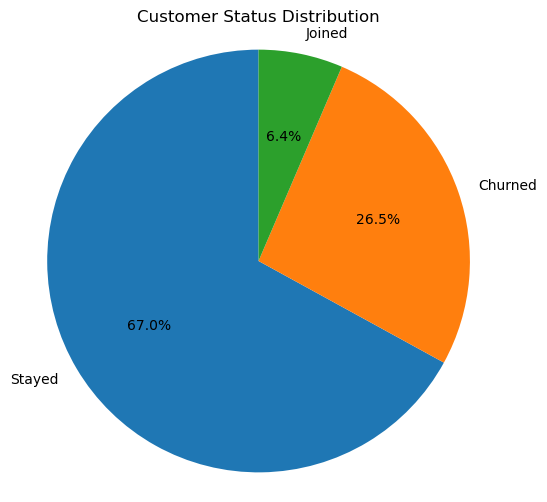

In [22]:
# Pie Chart - Churn Rate
plt.figure(figsize=(6, 6))
status_counts = df['customer_status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Status Distribution')
plt.axis('equal')

# Saved the pie chart
plt.savefig("churn_rate_pie_chart.png", dpi=300, bbox_inches='tight')

# Show the chart
plt.show()


### Q2: What customer types are more likely to churn?

Bar plot showing churn status across different contract types.


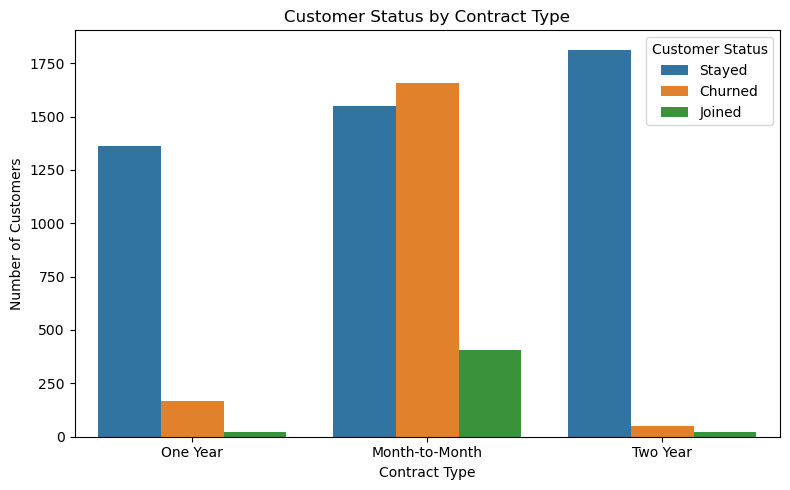

In [9]:
# Barplot - Contract Type vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='contract', hue='customer_status')
plt.title('Customer Status by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Customer Status')
plt.xticks(rotation=0)
plt.tight_layout()

# Saved the bar chart
plt.savefig("contract_type_vs_churn.png", dpi=300, bbox_inches='tight')

# Show the bar chart
plt.show()


### Q3: Does a customer's tenure affect churn?

Histogram showing customer tenure (in months) and their churn status.


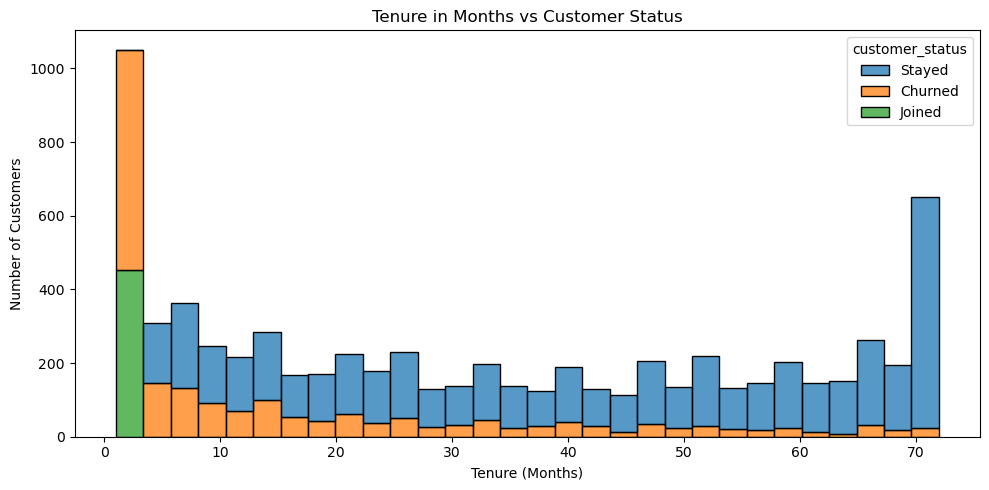

In [12]:
# Histogram - Tenure vs Churn
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure_in_months', hue='customer_status', bins=30, multiple='stack')
plt.title('Tenure in Months vs Customer Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.tight_layout()

# Saved the tenure histogram
plt.savefig("tenure_vs_churn.png", dpi=300, bbox_inches='tight')

# Show the histogram
plt.show()


### Q4: Do monthly charges impact churn likelihood?

KDE plot showing the distribution of monthly charges for churned vs stayed customers.


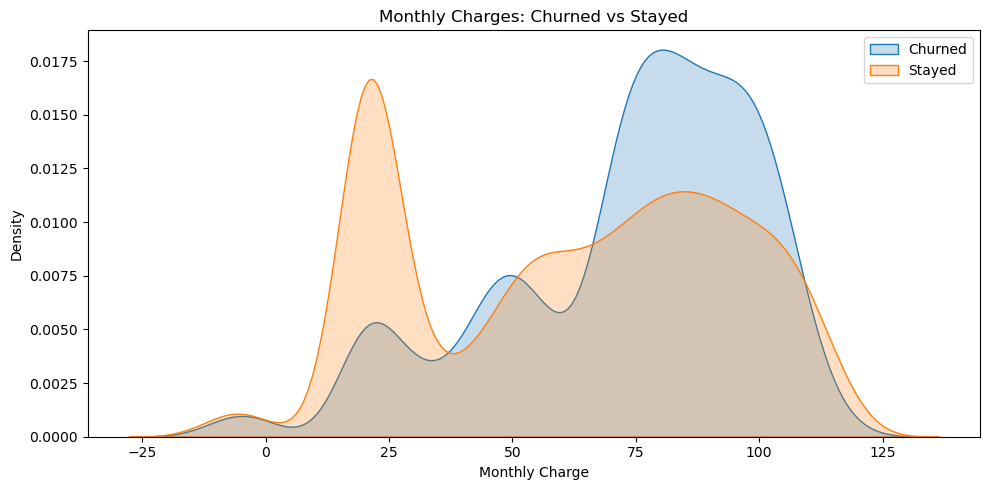

In [19]:
# KDE Plot - Monthly Charges vs Churn
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['customer_status'] == 'Churned'], x='monthly_charge', label='Churned', fill=True)
sns.kdeplot(data=df[df['customer_status'] == 'Stayed'], x='monthly_charge', label='Stayed', fill=True)
plt.title('Monthly Charges: Churned vs Stayed')
plt.xlabel('Monthly Charge')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

# Saved the KDE plot
plt.savefig("monthly_charges_kde.png", dpi=300, bbox_inches='tight')

# Show the KDE plot
plt.show()


# Conclusion and Recommendations

## Key Findings:
- About 26% of customers have churned, indicating a significant opportunity to improve retention.
- Customers with month-to-month contracts are far more likely to churn compared to those on longer contracts (one year or two years).
- Shorter tenure (new customers) are more likely to churn, suggesting the importance of customer onboarding and early engagement.
- Higher monthly charges slightly increase the likelihood of churn, showing a potential pricing sensitivity issue.

## Recommendations:
- Offer incentives or discounts for customers with month-to-month contracts to move to longer-term contracts.
- Strengthen onboarding experiences and customer support for newer customers to improve satisfaction early on.
- Monitor and optimize pricing strategies, especially for customers with higher monthly charges.
- Develop personalized retention strategies based on tenure and contract type insights.


